# UCI Machine Learning Repository: Bike Sharing Dataset

## Dataset Information

Bike sharing systems are the new business model of bike rentals where the whole process of membership, rental and return has become automatic. Through these systems, users can easily rent a bike from a particular position and return it at another position. Currently, there are over 500 bike-sharing programs around the world which is composed of over 500 thousand bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real-world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for business and research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## Model Building: Linear Regression

### Objective 1:
Using this dataset, we are interested in building linear models, both regularized and non-regularized, to determine the best performing model in terms of MSE, at different level of parameter alpha. Both LASSO and Ridge regression models will be built for our regularized linear regression models.

### Objective 2:
For each of the three types of regression models, we will attempt to determine the attributes that are the most important in determining the target variable y. 

### Objective 3:
For each of the two variables, 'casual' and 'registered', we want to determine how weighted importance between the two categories would affect our choice of alpha in objective 1. 

## Objective 1

### 1.0 Loading Packages and Reading Dataset

Prior to building our models, we will first perform preliminary data exploration to understand our data and to subsequently conduct the necessary data pre-processing.

We will first load the necessary packages, set our view of lists as tabular data (to allow us to view our data easily) and to read our dataset.

In [2]:
# Loading the Required Packages
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Setting List View in Tabular Format
class ListTable(list):       
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

# Reading Our Dataset
bikeshare = pd.read_csv('bike_sharing.csv')

### 1.1 Data Summary

Once we have read our dataset, we want to perform some basic data exploration to get a glimpse of our dataset.

The steps taken for our basic data exploration consist of the following:
1. Getting a summary of the first five rows of our dataset for all variables;
2. Getting a summary of the data type for each of our variable; and
3. Checking for missing values in our dataset

#### 1.1.1 Getting a summary of the first five rows of our dataset for all variables:

In [3]:
bikeshare.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### 1.1.2 Getting a summary of the data type for each of our variable:

In [4]:
bikeshare.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### 1.1.3 Checking for missing values in our dataset

In [5]:
num_row, num_col = bikeshare.shape

missing_value_count_row = {}
for i in range(num_row):
    value_count = bikeshare.iloc[i,:].value_counts()
    missing_count = 0
    if '?' in value_count:
        missing_count = value_count['?']
    if missing_count in missing_value_count_row:
        missing_value_count_row[missing_count].append(i)
    else:
        missing_value_count_row[missing_count] = [i]

for missing_count, row_list in missing_value_count_row.items():
    print('there are', missing_count * len(row_list), 'missing values in', len(row_list), 'out of', num_row, 'rows.')
    
missing_value_count_col = {}
for j in range(num_col):
    value_count = bikeshare.iloc[:,j].value_counts()
    missing_count = 0
    if '?' in value_count:
        missing_count = value_count['?']
    if missing_count in missing_value_count_col:
        missing_value_count_col[missing_count].append(j)
    else:
        missing_value_count_col[missing_count] = [j]

for missing_count, col_list in missing_value_count_col.items():
    print('there are', missing_count * len(col_list), 'missing values in', len(col_list), 'out of', num_col, 'columns.')

there are 0 missing values in 17379 out of 17379 rows.
there are 0 missing values in 17 out of 17 columns.


### 1.2 Basic Insights from Data Summary: Identification of Unnecessary Variables

After taking a glimpse of our data based on the above, we noticed that our dataset contains variables that do not appear to be useful for the purpose of building our Linear, LASSO and Ridge Regression Models. The following list indicate the variables that are not useful, and a brief description on why they are unnecessary in building our model:

##### (a) 'instant'
This variable is merely a record index of our dataset and will not be valuable in building our model

##### (b) 'dteday'
This variable has already been represented in other variables 'yr', 'mnth', 'weekday' and is thus not useful. Additionally, since it is a categorical data, we will not be able to feed this variable in our regression models, nor would it be feasible to create numerous dummy variables for this variable.

##### (c) 'cnt'
Since we will be using both 'casual' and 'registered' as our response variables, it would not be useful to use 'cnt', which is the combination of both 'casual' and 'registered' in our regression models.

Therefore, we will be removing these variables from our data.

#### 1.2.1 Removing Unnecessary Variables

In [6]:
bikeshare = bikeshare.drop(['cnt', 'instant', 'dteday'], axis = 1)

bikeshare.head(1)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13


### 1.3 Visualizing 'casual' and 'registered' Response Variable

Now that we have a basic understanding of our dataset and have removed all variables deemed unnecessary to build our regression models later, we should perform further data exploration in relation to both of our response variables 'casual' and 'registered'.

In this case, we will create boxplots to visualize the distribution of each response variable, as well as their distribution against other variables.

#### 1.3.1 Creating Box Plots for Response Variables

[Text(0, 0.5, 'Registered'),
 Text(0.5, 0, 'Working Day'),
 Text(0.5, 1.0, 'Box Plot On Registered Against Working Day')]

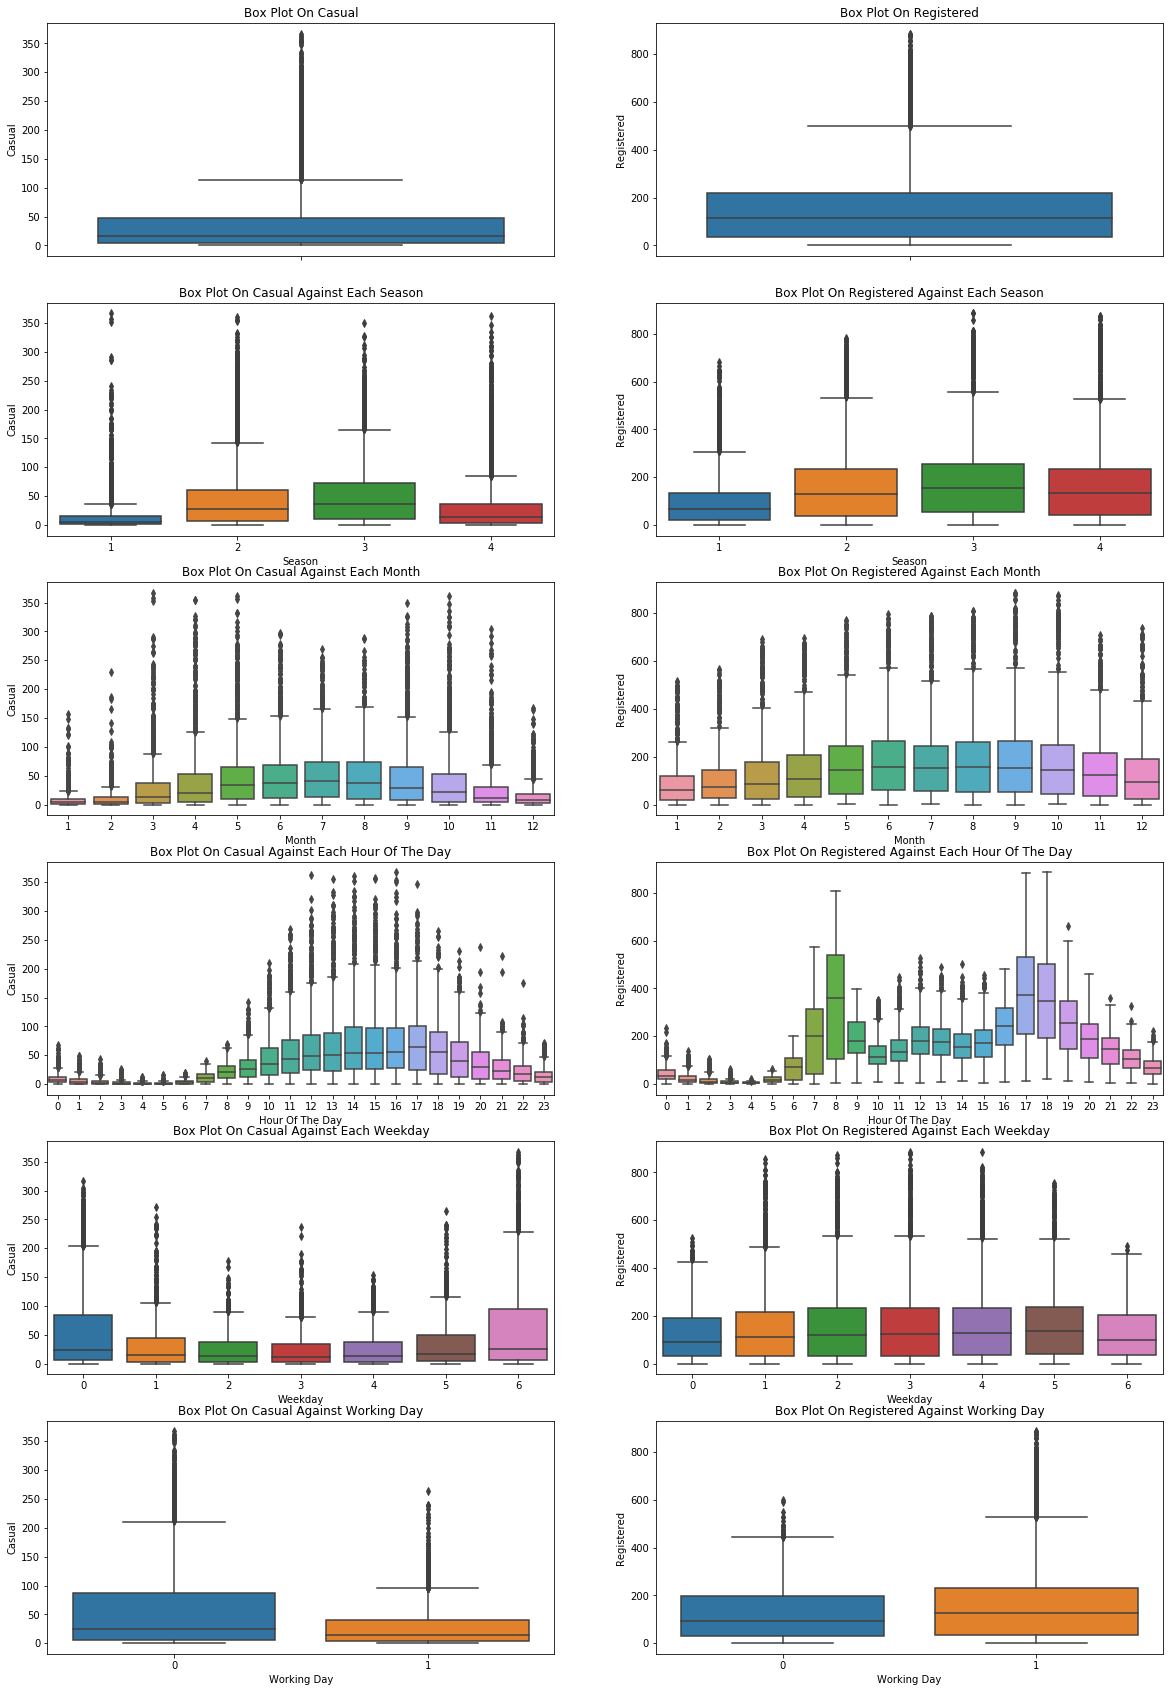

In [7]:
fig, axes = plt.subplots(nrows=6,ncols=2)
fig.set_size_inches(20, 30)
sns.boxplot(data=bikeshare,y="casual",orient="v",ax=axes[0][0])
sns.boxplot(data=bikeshare,y="registered",orient="v",ax=axes[0][1])
sns.boxplot(data=bikeshare,y="casual",x="season",orient="v",ax=axes[1][0])
sns.boxplot(data=bikeshare,y="registered",x="season",orient="v",ax=axes[1][1])
sns.boxplot(data=bikeshare,y="casual",x="mnth",orient="v",ax=axes[2][0])
sns.boxplot(data=bikeshare,y="registered",x="mnth",orient="v",ax=axes[2][1])
sns.boxplot(data=bikeshare,y="casual",x="hr",orient="v",ax=axes[3][0])
sns.boxplot(data=bikeshare,y="registered",x="hr",orient="v",ax=axes[3][1])
sns.boxplot(data=bikeshare,y="casual",x="weekday",orient="v",ax=axes[4][0])
sns.boxplot(data=bikeshare,y="registered",x="weekday",orient="v",ax=axes[4][1])
sns.boxplot(data=bikeshare,y="casual",x="workingday",orient="v",ax=axes[5][0])
sns.boxplot(data=bikeshare,y="registered",x="workingday",orient="v",ax=axes[5][1])

axes[0][0].set(ylabel='Casual',title="Box Plot On Casual")
axes[0][1].set(ylabel='Registered',title="Box Plot On Registered")
axes[1][0].set(xlabel='Season', ylabel='Casual',title="Box Plot On Casual Against Each Season")
axes[1][1].set(xlabel='Season', ylabel='Registered',title="Box Plot On Registered Against Each Season")
axes[2][0].set(xlabel='Month', ylabel='Casual',title="Box Plot On Casual Against Each Month")
axes[2][1].set(xlabel='Month', ylabel='Registered',title="Box Plot On Registered Against Each Month")
axes[3][0].set(xlabel='Hour Of The Day', ylabel='Casual',title="Box Plot On Casual Against Each Hour Of The Day")
axes[3][1].set(xlabel='Hour Of The Day', ylabel='Registered',title="Box Plot On Registered Against Each Hour Of The Day")
axes[4][0].set(xlabel='Weekday', ylabel='Casual',title="Box Plot On Casual Against Each Weekday")
axes[4][1].set(xlabel='Weekday', ylabel='Registered',title="Box Plot On Registered Against Each Weekday")
axes[5][0].set(xlabel='Working Day', ylabel='Casual',title="Box Plot On Casual Against Working Day")
axes[5][1].set(xlabel='Working Day', ylabel='Registered',title="Box Plot On Registered Against Working Day")

#### 1.3.2 Insights From Box Plots

Based on the box plots above, there are a couple of insights that we can obtain as indicated below:

##### (a) Busy Hours for Registered Users

Based on the box plots above, we can see that hours 8, 17 and 18 are highly significant hours where registered users will have higher usage of bikes. Since these hours might be useful, we will create a new variable to indicate if the rental hour of each bike rental record falls within these three time period, where '1' will indicate yes and '0' will indicate no.

##### (b) Outliers

Both casual and registered counts have high instances of outlying data points. In order to obtain better results for our models, we will be removing these outliers.

#### 1.3.3 Creating New Variable "busyhours"

In [8]:
bikeshare["busyhours"] = bikeshare.hr.map({0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:1, 9:0, 10:0, 11:0, 12:0, 13:0, 14:0, 15:0, 16:0, 17:1, 18:1, 19:0, 20:0, 21:0, 22:0, 23:0})

#### 1.3.4 Removing Outliers

In [9]:
bs1 = bikeshare[np.abs(bikeshare["casual"] -bikeshare["casual"].mean()) <= (3 * bikeshare["casual"].std())] 

bs2 = bs1[np.abs(bs1["registered"] - bs1["registered"].mean()) <= (3 * bs1["registered"].std())] 

### 1.4 Creating Dummy Variables

Next, in order to correctly fit our categorical and ordinal variables into our regression models, we will create sets of dummy variables for our categorical and ordinal variables to be associated with.

#### 1.4.1 Creating Dummy Variables
For our dummy variables, we will set 'weathersit' as our ordinal variable and 'season', 'holiday', 'working day' and 'busyhours' as our categorical variables.

In [10]:
null_value = [
    '?',
    'no',
    'none',
    'other',
    'unknown/invalid']

def convert_nominal_column(col):
    distinct_value = list(set(col.values))
    value_to_be_mapped = []
    null_value_count = 0
    for v in distinct_value:
        if str(v).lower() in null_value:
            null_value_count += 1
        else:
            value_to_be_mapped.append(v)
    if null_value_count > 1:
        print('more than 1 null value exists in column', col.name, ', please revise your code')
        return None, None
    if len(value_to_be_mapped) == 0:
        print('no value to be converted for column', col.name, ', skip')
        return None, None
    if len(value_to_be_mapped) > 50:
        print('too many columns if column', col.name, "were to converted, let's ignore for now")
        return None, None
    mat = np.zeros((len(col), len(value_to_be_mapped)))
    for j in range(len(value_to_be_mapped)):
        mat[:,j] = np.array(col == value_to_be_mapped[j], dtype = 'int')
    header = [col.name + '_=_' + str(i) for i in value_to_be_mapped]
    return header, mat

numerical_column = [
    'yr',
    'mnth',
    'hr',
    'weekday',
    'temp',
    'atemp',
    'hum',
    'windspeed']

response_column = [
    'casual',
    'registered']

ordinal_column = [
    'weathersit']

def convert_ordinal_column(col):
    distinct_value = list(set(col.values))
    if len(distinct_value) == 1:
        print('same value in column', col.name, ', skip')
        return None, None
    value_to_be_mapped = distinct_value[1:]
    if len(value_to_be_mapped) > 50:
        print('too many columns if column', col.name, "were to converted, let's ignore for now")
        return None, None
    mat = np.zeros((len(col), len(value_to_be_mapped)))
    for j in range(len(value_to_be_mapped)):
        mat[:,j] = np.array(col >= value_to_be_mapped[j], dtype = 'int')
    header = [col.name + '_=_' + str(i) for i in value_to_be_mapped]
    return header, mat

header_X1 = []
num_row = len(bs2)
X1 = np.zeros((num_row,0))

for col in bs2.columns:
    if col in response_column:
        continue
    elif col in numerical_column:
        if col in ordinal_column:
            header, mat = convert_ordinal_column(bs2[col])
            if header is not None:
                header_X1.extend(header)
                X1 = np.hstack((X1, mat))
        else:
            header_X1.append(col)
            X1 = np.hstack((X1, np.array(bs2[col]).reshape(num_row,1)))
    else:
        header, mat = convert_nominal_column(bs2[col])
        if header is not None:
            header_X1.extend(header)
            X1 = np.hstack((X1, mat))
            
print('the shape of matrix X1:', X1.shape)
print('the headers of matrix X1: ', header_X1)

the shape of matrix X1: (16531, 22)
the headers of matrix X1:  ['season_=_1', 'season_=_2', 'season_=_3', 'season_=_4', 'yr', 'mnth', 'hr', 'holiday_=_0', 'holiday_=_1', 'weekday', 'workingday_=_0', 'workingday_=_1', 'weathersit_=_1', 'weathersit_=_2', 'weathersit_=_3', 'weathersit_=_4', 'temp', 'atemp', 'hum', 'windspeed', 'busyhours_=_0', 'busyhours_=_1']


#### 1.4.2 Setting x
Thereafter, we will save our x variables (with newly created dummy variables) under matrix 'x'.

In [11]:
x = np.asmatrix(X1)

### 1.5 Setting Train and Test Data

Once we have our data ready to be used in creating our models, we will first separate our dataset into train and test datasets.

In [12]:
from datetime import datetime
np.random.seed(datetime.now().microsecond)
np.random.seed(2018)

train = np.random.choice([True, False], num_row, replace=True, p=[0.9,0.1])

y_registered = np.transpose(np.asmatrix(bs2.iloc[:, -2]))
y_casual = np.transpose(np.asmatrix(bs2.iloc[:, -3]))
y = np.asmatrix(bs2.iloc[:, 12:14])

x_train = x[train,:]
y_registered_train = y_registered[train]
y_casual_train = y_casual[train]
y_train = y[train]

x_test = x[~train,:]
y_registered_test = y_registered[~train]
y_casual_test = y_casual[~train]
y_test = y[~train]

### 1.6 Calculating MSE for Linear Regression

Once we have our Train and Test Dataset, we will proceed to calculate the MSE for our Linear Regression Model. This can be done by applying the sklearn package.

#### 1.6.1 By Using sklearn Package to Calculate MSE for Linear Regression (Multioutput = 'uniform_average')

In [13]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(x_train, y_train)
mse_linear_reg_sk = mean_squared_error(y_test, regr_linear.predict(x_test), multioutput = 'uniform_average')
print('By applying Uniform Weight to both casual and registered response variables, the MSE of both response variables is:', mse_linear_reg_sk, "\n")

By applying Uniform Weight to both casual and registered response variables, the MSE of both response variables is: 4602.826216374145 



### 1.7 Setting alpha for LASSO and Ridge Regression Model

In [14]:
alpha = [0.01, 0.1, 1, 10, 100]

### 1.8 Calculating Regularized Cost Function for LASSO Regression

In [15]:
mse_lasso_final = []
cplxy_final = []
cost_lasso_final = []

for a in alpha:
    regr_lasso = linear_model.Lasso(alpha = a)
    regr_lasso.fit(x_train, y_train)
    
    mse_lasso_sk = [mean_squared_error(y_test, regr_lasso.predict(x_test), multioutput = 'uniform_average')]
    for results in mse_lasso_sk:
        mse_lasso_final.append(results)       
    
    cplxy = [np.linalg.norm(regr_lasso.coef_, 'nuc')]
    for results in cplxy:
        cplxy_final.append(results)  

for i in range(5):
    cost_lasso = [mse_lasso_final[i] + alpha[i] * cplxy_final[i]]
    for result in cost_lasso:
        cost_lasso_final.append(result)

table_val = np.vstack((mse_lasso_final, cplxy_final, cost_lasso_final))


table_ind = np.asarray([["MSE"],
                    ["model complexity"],
                    ["regularized cost"]])

table_disp = np.hstack((table_ind, table_val))



table = ListTable()
table.append(["LASSO", "alpha = 0.01", "alpha = 0.1", "alpha = 1", "alpha = 10", "alpha = 100"])
for i in range(3):
    table.append(table_disp[i])

table

LASSO,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
MSE,4600.308938540617,4594.433043392035,4653.866860332796,6750.814747812974,7760.404865932218
model complexity,344.2242436821441,334.8782425610335,268.3384309066268,46.90530934173412,5.366564311624182
regularized cost,4603.751180977439,4627.9208676481385,4922.205291239423,7219.867841230315,8297.061297094637


In [16]:
print("The alpha of the best LASSO Regression is: ", 0.01, "\n")

The alpha of the best LASSO Regression is:  0.01 



### 1.9 Calculating Regularized Cost Function for Ridge Regression

In [17]:
mse_ridge_final = []
cplxy_final = []
cost_ridge_final = []

for a in alpha:
    regr_ridge = linear_model.Ridge(alpha = a)
    regr_ridge.fit(x_train, y_train)
    
    mse_ridge_sk = [mean_squared_error(y_test, regr_ridge.predict(x_test), multioutput = 'uniform_average')]
    for results in mse_ridge_sk:
        mse_ridge_final.append(results)
    
    cplxy = [np.linalg.norm(regr_ridge.coef_, 'fro')]
    for results in cplxy:
        cplxy_final.append(results)  

for i in range(5):
    cost_ridge = [mse_ridge_final[i] + alpha[i] * cplxy_final[i]]
    for result in cost_ridge:
        cost_ridge_final.append(result)

table_val = np.vstack((mse_ridge_final, cplxy_final, cost_ridge_final))


table_ind = np.asarray([["MSE"],
                    ["model complexity"],
                    ["regularized cost"]])

table_disp = np.hstack((table_ind, table_val))



table = ListTable()
table.append(["Ridge", "alpha = 0.01", "alpha = 0.1", "alpha = 1", "alpha = 10", "alpha = 100"])
for i in range(3):
    table.append(table_disp[i])

table

Ridge,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
MSE,4601.18622457669,4601.142218161913,4600.751820578882,4598.2246807101255,4599.687609379913
model complexity,243.72013535686753,243.40010666919477,240.86073724088516,232.51051396201888,204.18547670220028
regularized cost,4603.623425930258,4625.482228828832,4841.612557819767,6923.329820330315,25018.23527959994


In [18]:
print("The alpha of the best Ridge Regression is: ", 0.01, "\n")

The alpha of the best Ridge Regression is:  0.01 



## Objective 2

### 2.1 Finding the Two Best Attributes for Each Regression Model for Each Response Variable

In order to select the two best attributes for each regression model for each response variable, we will select the pair of attributes with the lowest calculated MSE. In order to do so, we will create a function to calculate the MSE of all possible pairs of attributes.

Since we have a total of 22 attributes (Attribute 0 to Attribute 21), we will have a total of 1+2+3+...+22 = 253 iterations for each regression model, where we will iterate through '(Attribute 0, Attribute 1), (Attribute 0, Attribute 2), ... , (Attribute 21, Attribute 22)' to calculate the MSE for each pair.

The pair with the lowest attribute for each regression model will then be identified.

Note: For LASSO and Ridge Regression model, we will be using alpha of 0.01 as they were the best alpha obtained based on the results obtained above.

In [19]:
regr_linear_casual = linear_model.LinearRegression()
regr_linear_registered = linear_model.LinearRegression()
regr_lasso_casual = linear_model.Lasso(alpha = 0.01)
regr_lasso_registered = linear_model.Lasso(alpha = 0.01)
regr_ridge_casual = linear_model.Ridge(alpha = 0.01)
regr_ridge_registered = linear_model.Ridge(alpha = 0.01)

def var_select(regression_type):
    num_row_mat, num_col_mat = x_train.shape
    if regression_type == 'linear_casual':
        mse_linear_casual_result = []
        for i in range(num_col_mat):
            for j in range(i+1, num_col_mat):
                regr_linear_casual.fit(x_train[:,[i,j]], y_casual_train)
                mse_linear_casual = [np.sum(np.dot(np.transpose(y_casual_test - regr_linear_casual.predict(x_test[:,[i,j]])), (y_casual_test - regr_linear_casual.predict(x_test[:,[i,j]])))) / y_casual_test.shape[0]]
                for result in mse_linear_casual:
                    mse_linear_casual_result.append([result, i, j])
        for v in mse_linear_casual_result:
            if v == min(mse_linear_casual_result):
                print("The following is the smallest MSE for Linear Regression of Response Variable 'casual' and its corresponding two best attribute columns: " + str(v))
                break
                
    elif regression_type == 'linear_registered':
        mse_linear_registered_result = []
        for i in range(num_col_mat):
            for j in range(i+1, num_col_mat):
                regr_linear_registered.fit(x_train[:,[i,j]], y_registered_train)
                mse_linear_registered = [np.sum(np.dot(np.transpose(y_registered_test - regr_linear_registered.predict(x_test[:,[i,j]])), (y_registered_test - regr_linear_registered.predict(x_test[:,[i,j]])))) / y_registered_test.shape[0]]
                for result in mse_linear_registered:
                    mse_linear_registered_result.append([result, i, j])
        for v in mse_linear_registered_result:
            if v == min(mse_linear_registered_result):
                print("The following is the smallest MSE for Linear Regression of Response Variable 'registered' and its corresponding two best attribute columns: " + str(v))
                break
                
    elif regression_type == 'lasso_casual':
        mse_lasso_casual_result = []
        for i in range(num_col_mat):
            for j in range(i+1, num_col_mat):
                regr_lasso_casual.fit(x_train[:,[i,j]], y_casual_train)
                mse_lasso_casual = [np.sum(np.dot(np.transpose(y_casual_test - np.transpose(np.asmatrix(regr_lasso_casual.predict(x_test[:,[i,j]])))), (y_casual_test - np.transpose(np.asmatrix(regr_lasso_casual.predict(x_test[:,[i,j]])))))) / (y_casual_test.shape[0])] 
                for result in mse_lasso_casual:
                    mse_lasso_casual_result.append([result, i, j])
        for v in mse_lasso_casual_result:
            if v == min(mse_lasso_casual_result):
                print("The following is the smallest MSE for LASSO Regression of Response Variable 'casual' and its corresponding two best attribute columns: " + str(v))
                break
                
    elif regression_type == 'lasso_registered':
        mse_lasso_registered_result = []
        for i in range(num_col_mat):
            for j in range(i+1, num_col_mat):
                regr_lasso_registered.fit(x_train[:,[i,j]], y_registered_train)
                mse_lasso_registered = [np.sum(np.dot(np.transpose(y_registered_test - np.transpose(np.asmatrix(regr_lasso_registered.predict(x_test[:,[i,j]])))), (y_registered_test - np.transpose(np.asmatrix(regr_lasso_registered.predict(x_test[:,[i,j]])))))) / (y_registered_test.shape[0])] 
                for result in mse_lasso_registered:
                    mse_lasso_registered_result.append([result, i, j])
        for v in mse_lasso_registered_result:
            if v == min(mse_lasso_registered_result):
                print("The following is the smallest MSE for LASSO Regression of Response Variable 'registered' and its corresponding two best attribute columns: " + str(v))
                break
                
    elif regression_type == 'ridge_casual':
        mse_ridge_casual_result = []
        for i in range(num_col_mat):
            for j in range(i+1, num_col_mat):
                regr_ridge_casual.fit(x_train[:,[i,j]], y_casual_train)
                mse_ridge_casual = [np.sum(np.dot(np.transpose(y_casual_test - regr_ridge_casual.predict(x_test[:,[i,j]])), (y_casual_test - regr_ridge_casual.predict(x_test[:,[i,j]])))) / (y_casual_test.shape[0])]
                for result in mse_ridge_casual:
                    mse_ridge_casual_result.append([result, i, j])
        for v in mse_ridge_casual_result:
            if v == min(mse_ridge_casual_result):
                print("The following is the smallest MSE for Ridge Regression of Response Variable 'casual' and its corresponding two best attribute columns: " + str(v))
                break
                
    elif regression_type == 'ridge_registered':
        mse_ridge_registered_result = []
        for i in range(num_col_mat):
            for j in range(i+1, num_col_mat):
                regr_ridge_registered.fit(x_train[:,[i,j]], y_registered_train)
                mse_ridge_registered = [np.sum(np.dot(np.transpose(y_registered_test - regr_ridge_registered.predict(x_test[:,[i,j]])), (y_registered_test - regr_ridge_registered.predict(x_test[:,[i,j]])))) / (y_registered_test.shape[0])]
                for result in mse_ridge_registered:
                    mse_ridge_registered_result.append([result, i, j])
        for v in mse_ridge_registered_result:
            if v == min(mse_ridge_registered_result):
                print("The following is the smallest MSE for Ridge Regression of Response Variable 'registered' and its corresponding two best attribute columns: " + str(v))
                break
        
var_select('linear_casual')
print("\n")
var_select('linear_registered')
print("\n")
var_select('lasso_casual')
print("\n")
var_select('lasso_registered')
print("\n")
var_select('ridge_casual')
print("\n")
var_select('ridge_registered')

The following is the smallest MSE for Linear Regression of Response Variable 'casual' and its corresponding two best attribute columns: [839.3124345858505, 16, 18]


The following is the smallest MSE for Linear Regression of Response Variable 'registered' and its corresponding two best attribute columns: [11503.730405757029, 6, 20]


The following is the smallest MSE for LASSO Regression of Response Variable 'casual' and its corresponding two best attribute columns: [839.3002111583605, 16, 18]


The following is the smallest MSE for LASSO Regression of Response Variable 'registered' and its corresponding two best attribute columns: [11504.127527038967, 6, 20]


The following is the smallest MSE for Ridge Regression of Response Variable 'casual' and its corresponding two best attribute columns: [839.3124304785954, 16, 18]


The following is the smallest MSE for Ridge Regression of Response Variable 'registered' and its corresponding two best attribute columns: [11503.734444708984, 6, 20

### 2.2 Visualizing the Two Best Attributes for Each Regression Model for Each Response Variable

Next, we will visualize the two best attributes for each regression model for each response variable as follow:

#### 2.2.1 For Linear Regression, 'casual' Response Variable

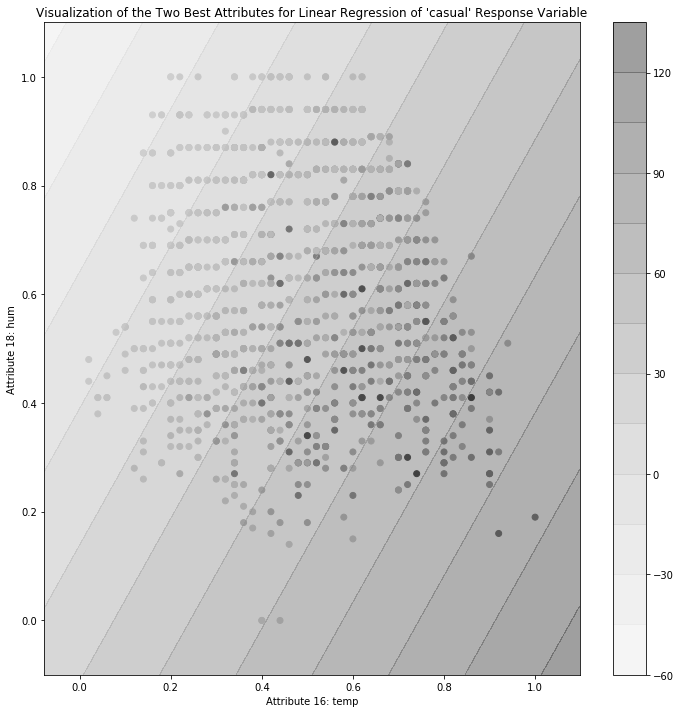

In [20]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200

regr_linear_casual.fit(np.asarray(x_train[:,[16, 18]]), np.asarray(y_casual_train))

x0 = my_linspace(min(np.asarray(x_test[:,16])), max(np.asarray(x_test[:,16])), steps)
x1 = my_linspace(min(np.asarray(x_test[:,18])), max(np.asarray(x_test[:,18])), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_predict = regr_linear_casual.predict(mesh_data).reshape(steps, steps)

plt.figure(figsize=(12, 12))
vmin = np.min(np.asarray(y_casual_test)) - (np.max(np.asarray(y_casual_test)) 
                                                        - np.min(np.asarray(y_casual_test))) * 0.5
vmax = np.max(np.asarray(y_casual_test))
plt.scatter(x = np.asarray(x_test[:,16]), 
            y = np.asarray(x_test[:,18]), 
            c = np.asarray(y_casual_test), 
            cmap = 'Greys',
            vmin = vmin,
            vmax = vmax,
            marker = 'o')

plt.contourf(xx0, 
             xx1, 
             mesh_predict, 
             12,
             cmap='Greys',
             vmin = vmin,
             vmax = vmax,
             alpha = 0.5)

plt.colorbar()
plt.xlabel("Attribute 16: temp")
plt.ylabel("Attribute 18: hum")
plt.title("Visualization of the Two Best Attributes for Linear Regression of 'casual' Response Variable")
plt.show()

#### 2.2.2 For Linear Regression, 'registered' Response Variable

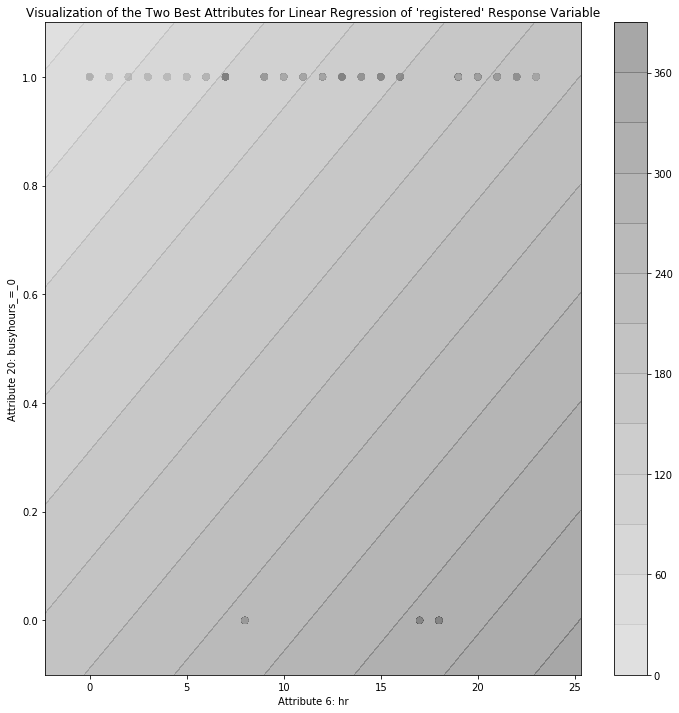

In [21]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200

regr_linear_registered.fit(np.asarray(x_train[:,[6, 20]]), np.asarray(y_registered_train))

x0 = my_linspace(min(np.asarray(x_test[:,6])), max(np.asarray(x_test[:,6])), steps)
x1 = my_linspace(min(np.asarray(x_test[:,20])), max(np.asarray(x_test[:,20])), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_predict = regr_linear_registered.predict(mesh_data).reshape(steps, steps)

plt.figure(figsize=(12, 12))
vmin = np.min(np.asarray(y_registered_test)) - (np.max(np.asarray(y_registered_test)) 
                                                        - np.min(np.asarray(y_registered_test))) * 0.5
vmax = np.max(np.asarray(y_registered_test))
plt.scatter(x = np.asarray(x_test[:,6]), 
            y = np.asarray(x_test[:,20]), 
            c = np.asarray(y_registered_test), 
            cmap = 'Greys',
            vmin = vmin,
            vmax = vmax,
            marker = 'o')

plt.contourf(xx0, 
             xx1, 
             mesh_predict, 
             12,
             cmap='Greys',
             vmin = vmin,
             vmax = vmax,
             alpha = 0.5)

plt.colorbar()
plt.xlabel("Attribute 6: hr")
plt.ylabel("Attribute 20: busyhours_=_0")
plt.title("Visualization of the Two Best Attributes for Linear Regression of 'registered' Response Variable")
plt.show()

#### 2.2.3 For LASSO Regression, 'casual' Response Variable

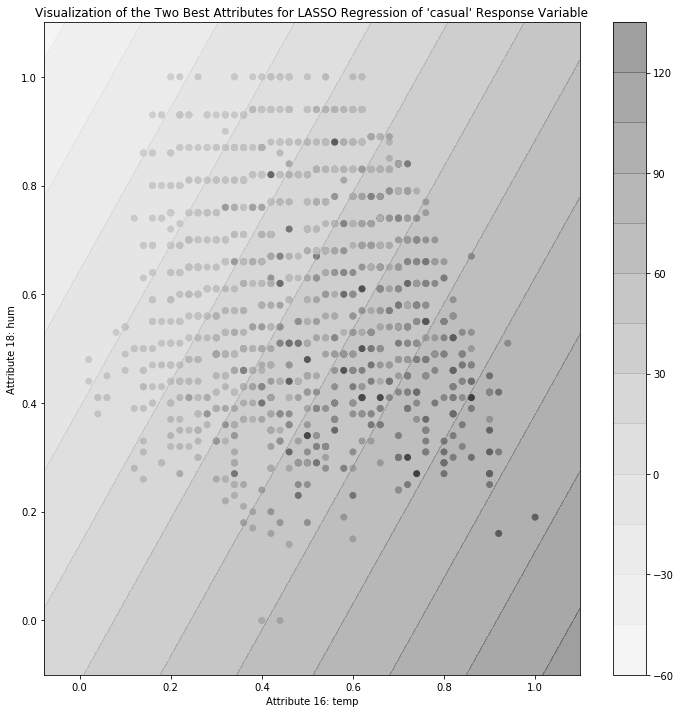

In [22]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200

regr_lasso_casual.fit(np.asarray(x_train[:,[16, 18]]), np.asarray(y_casual_train))

x0 = my_linspace(min(np.asarray(x_test[:,16])), max(np.asarray(x_test[:,16])), steps)
x1 = my_linspace(min(np.asarray(x_test[:,18])), max(np.asarray(x_test[:,18])), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_predict = regr_lasso_casual.predict(mesh_data).reshape(steps, steps)

plt.figure(figsize=(12, 12))
vmin = np.min(np.asarray(y_casual_test)) - (np.max(np.asarray(y_casual_test)) 
                                                        - np.min(np.asarray(y_casual_test))) * 0.5
vmax = np.max(np.asarray(y_casual_test))
plt.scatter(x = np.asarray(x_test[:,16]), 
            y = np.asarray(x_test[:,18]), 
            c = np.asarray(y_casual_test), 
            cmap = 'Greys',
            vmin = vmin,
            vmax = vmax,
            marker = 'o')

plt.contourf(xx0, 
             xx1, 
             mesh_predict, 
             12,
             cmap='Greys',
             vmin = vmin,
             vmax = vmax,
             alpha = 0.5)

plt.colorbar()
plt.xlabel("Attribute 16: temp")
plt.ylabel("Attribute 18: hum")
plt.title("Visualization of the Two Best Attributes for LASSO Regression of 'casual' Response Variable")
plt.show()

#### 2.2.4 For LASSO Regression, 'registered' Response Variable

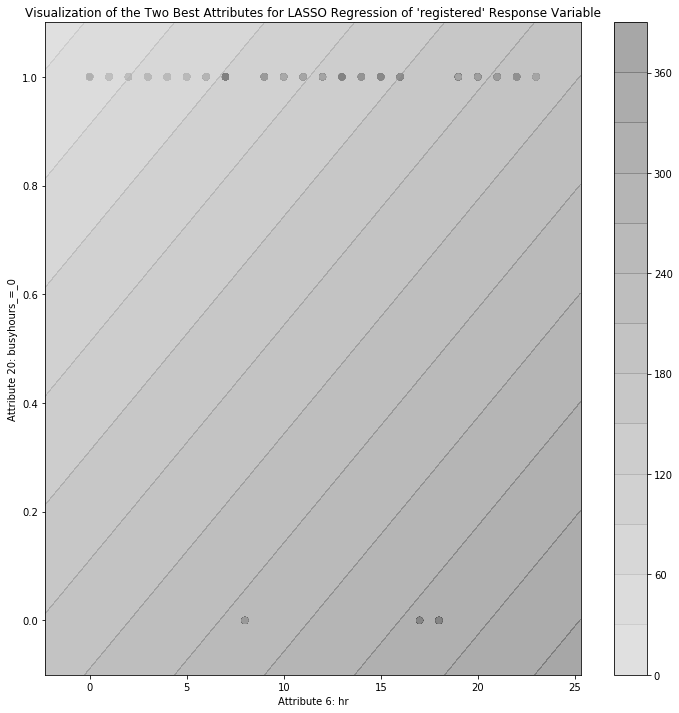

In [24]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200

regr_lasso_registered.fit(np.asarray(x_train[:,[6, 20]]), np.asarray(y_registered_train))

x0 = my_linspace(min(np.asarray(x_test[:,6])), max(np.asarray(x_test[:,6])), steps)
x1 = my_linspace(min(np.asarray(x_test[:,20])), max(np.asarray(x_test[:,20])), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_predict = regr_lasso_registered.predict(mesh_data).reshape(steps, steps)

plt.figure(figsize=(12, 12))
vmin = np.min(np.asarray(y_registered_test)) - (np.max(np.asarray(y_registered_test)) 
                                                        - np.min(np.asarray(y_registered_test))) * 0.5
vmax = np.max(np.asarray(y_registered_test))
plt.scatter(x = np.asarray(x_test[:,6]), 
            y = np.asarray(x_test[:,20]), 
            c = np.asarray(y_registered_test), 
            cmap = 'Greys',
            vmin = vmin,
            vmax = vmax,
            marker = 'o')

plt.contourf(xx0, 
             xx1, 
             mesh_predict, 
             12,
             cmap='Greys',
             vmin = vmin,
             vmax = vmax,
             alpha = 0.5)

plt.colorbar()
plt.xlabel("Attribute 6: hr")
plt.ylabel("Attribute 20: busyhours_=_0")
plt.title("Visualization of the Two Best Attributes for LASSO Regression of 'registered' Response Variable")
plt.show()

#### 2.2.5. For Ridge Regression, 'casual' Response Variable

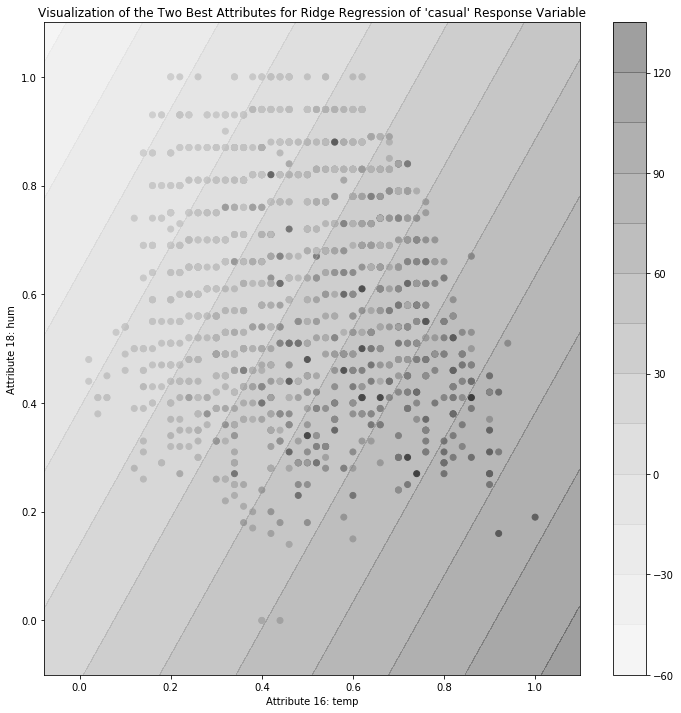

In [25]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200

regr_ridge_casual.fit(np.asarray(x_train[:,[16, 18]]), np.asarray(y_casual_train))

x0 = my_linspace(min(np.asarray(x_test[:,16])), max(np.asarray(x_test[:,16])), steps)
x1 = my_linspace(min(np.asarray(x_test[:,18])), max(np.asarray(x_test[:,18])), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_predict = regr_ridge_casual.predict(mesh_data).reshape(steps, steps)

plt.figure(figsize=(12, 12))
vmin = np.min(np.asarray(y_casual_test)) - (np.max(np.asarray(y_casual_test)) 
                                                        - np.min(np.asarray(y_casual_test))) * 0.5
vmax = np.max(np.asarray(y_casual_test))
plt.scatter(x = np.asarray(x_test[:,16]), 
            y = np.asarray(x_test[:,18]), 
            c = np.asarray(y_casual_test), 
            cmap = 'Greys',
            vmin = vmin,
            vmax = vmax,
            marker = 'o')

plt.contourf(xx0, 
             xx1, 
             mesh_predict, 
             12,
             cmap='Greys',
             vmin = vmin,
             vmax = vmax,
             alpha = 0.5)

plt.colorbar()
plt.xlabel("Attribute 16: temp")
plt.ylabel("Attribute 18: hum")
plt.title("Visualization of the Two Best Attributes for Ridge Regression of 'casual' Response Variable")
plt.show()

#### 2.2.6 For Ridge Regression, 'registered' Response Variable

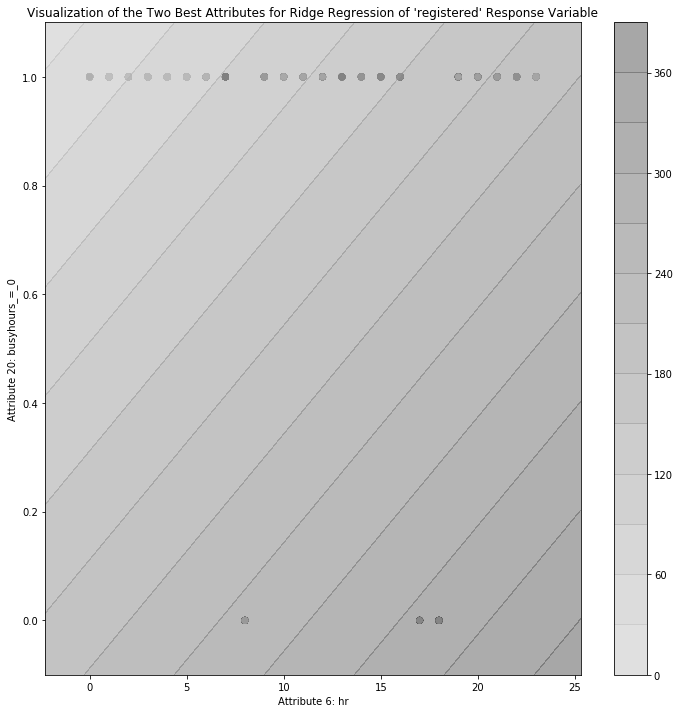

In [26]:
def my_linspace(min_value, max_value, steps):
    diff = max_value - min_value
    return np.linspace(min_value - 0.1 * diff, max_value + 0.1 * diff, steps)

steps = 200

regr_ridge_registered.fit(np.asarray(x_train[:,[6, 20]]), np.asarray(y_registered_train))

x0 = my_linspace(min(np.asarray(x_test[:,6])), max(np.asarray(x_test[:,6])), steps)
x1 = my_linspace(min(np.asarray(x_test[:,20])), max(np.asarray(x_test[:,20])), steps)
xx0, xx1 = np.meshgrid(x0, x1)
mesh_data = np.c_[xx0.ravel(), xx1.ravel()]
mesh_predict = regr_ridge_registered.predict(mesh_data).reshape(steps, steps)

plt.figure(figsize=(12, 12))
vmin = np.min(np.asarray(y_registered_test)) - (np.max(np.asarray(y_registered_test)) 
                                                        - np.min(np.asarray(y_registered_test))) * 0.5
vmax = np.max(np.asarray(y_registered_test))
plt.scatter(x = np.asarray(x_test[:,6]), 
            y = np.asarray(x_test[:,20]), 
            c = np.asarray(y_registered_test), 
            cmap = 'Greys',
            vmin = vmin,
            vmax = vmax,
            marker = 'o')

plt.contourf(xx0, 
             xx1, 
             mesh_predict, 
             12,
             cmap='Greys',
             vmin = vmin,
             vmax = vmax,
             alpha = 0.5)

plt.colorbar()
plt.xlabel("Attribute 6: hr")
plt.ylabel("Attribute 20: busyhours_=_0")
plt.title("Visualization of the Two Best Attributes for Ridge Regression of 'registered' Response Variable")
plt.show()

## Objective 3

### 3.1 Weighing Response Variables
In the event that more emphasis is placed on the a particular response variable, we want to weigh the MSE on a particular response variable more importantly than the MSE of the other response variable. 

Suppose we want to place a (0.8, 0.2), or a (0.2, 0.8) distribution of emphasis to the MSE on the 'casual' and 'registered' response variable respectively, we can calculate the distributed weighted MSE by using the sklearn package, for each of the three regression models. 

### 3.2 For Linear Regression: With (0.8, 0.2) Distribution of Emphasis to the MSE on 'casual' and 'registered' Response Variables

In [27]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(x_train, y_train)
mse_linear_reg_sk = mean_squared_error(y_test, regr_linear.predict(x_test), multioutput = [0.8,0.2])
print('By applying (0.8, 0.2) distribution to casual and registered response variables, the MSE of the linear regression on test data is:', mse_linear_reg_sk, "\n")

By applying (0.8, 0.2) distribution to casual and registered response variables, the MSE of the linear regression on test data is: 2240.035606431339 



### 3.3 For Linear Regression: With (0.2, 0.8) Distribution of Emphasis to the MSE on 'casual' and 'registered' Response Variables

In [28]:
regr_linear = linear_model.LinearRegression()
regr_linear.fit(x_train, y_train)
mse_linear_reg_sk = mean_squared_error(y_test, regr_linear.predict(x_test), multioutput = [0.2,0.8])
print('By applying (0.2, 0.8) distribution to casual and registered response variables, the MSE of the linear regression on test data is:', mse_linear_reg_sk, "\n")

By applying (0.2, 0.8) distribution to casual and registered response variables, the MSE of the linear regression on test data is: 6965.616826316952 



### 3.4 For LASSO Regression: With (0.8, 0.2) Distribution of Emphasis to the MSE on 'casual' and 'registered' Response Variables

In [29]:
mse_lasso_final = []
cplxy_final = []
cost_lasso_final = []

for a in alpha:
    regr_lasso = linear_model.Lasso(alpha = a)
    regr_lasso.fit(x_train, y_train)
    
    mse_lasso_sk = [mean_squared_error(y_test, regr_lasso.predict(x_test), multioutput = [0.8,0.2])]
    for results in mse_lasso_sk:
        mse_lasso_final.append(results)       
    
    cplxy = [np.linalg.norm(regr_lasso.coef_, 'nuc')]    
    for results in cplxy:
        cplxy_final.append(results)  

for i in range(5):
    cost_lasso = [mse_lasso_final[i] + alpha[i] * cplxy_final[i]]
    for result in cost_lasso:
        cost_lasso_final.append(result)

table_val = np.vstack((mse_lasso_final, cplxy_final, cost_lasso_final))


table_ind = np.asarray([["MSE"],
                    ["model complexity"],
                    ["regularized cost"]])

table_disp = np.hstack((table_ind, table_val))



table = ListTable()
table.append(["LASSO", "alpha = 0.01", "alpha = 0.1", "alpha = 1", "alpha = 10", "alpha = 100"])
for i in range(3):
    table.append(table_disp[i])

table

LASSO,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
MSE,2238.7893376583224,2235.9947237794922,2302.6179783486714,3367.22360317578,3863.013323164907
model complexity,344.2242436821441,334.8782425610335,268.3384309066268,46.90530934173412,5.366564311624182
regularized cost,2242.2315800951437,2269.4825480355958,2570.9564092552982,3836.2766965931214,4399.669754327325


In [30]:
print("By applying (0.8, 0.2) distribution to casual and registered response variables, the alpha of the best LASSO Regression is: ", 0.01, "\n")

print("There is no change in choice of alpha")

By applying (0.8, 0.2) distribution to casual and registered response variables, the alpha of the best LASSO Regression is:  0.01 

There is no change in choice of alpha


### 3.5. For LASSO Regression: With (0.2, 0.8) Distribution of Emphasis to the MSE on 'casual' and 'registered' Response Variables

In [31]:
mse_lasso_final = []
cplxy_final = []
cost_lasso_final = []

for a in alpha:
    regr_lasso = linear_model.Lasso(alpha = a)
    regr_lasso.fit(x_train, y_train)
    
    mse_lasso_sk = [mean_squared_error(y_test, regr_lasso.predict(x_test), multioutput = [0.2,0.8])]
    for results in mse_lasso_sk:
        mse_lasso_final.append(results)       
    
    cplxy = [np.linalg.norm(regr_lasso.coef_, 'nuc')]    
    for results in cplxy:
        cplxy_final.append(results)  

for i in range(5):
    cost_lasso = [mse_lasso_final[i] + alpha[i] * cplxy_final[i]]
    for result in cost_lasso:
        cost_lasso_final.append(result)

table_val = np.vstack((mse_lasso_final, cplxy_final, cost_lasso_final))


table_ind = np.asarray([["MSE"],
                    ["model complexity"],
                    ["regularized cost"]])

table_disp = np.hstack((table_ind, table_val))



table = ListTable()
table.append(["LASSO", "alpha = 0.01", "alpha = 0.1", "alpha = 1", "alpha = 10", "alpha = 100"])
for i in range(3):
    table.append(table_disp[i])

table

LASSO,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
MSE,6961.828539422913,6952.871363004579,7005.115742316921,10134.40589245017,11657.79640869953
model complexity,344.2242436821441,334.8782425610335,268.3384309066268,46.90530934173412,5.366564311624182
regularized cost,6965.270781859735,6986.359187260682,7273.4541732235475,10603.45898586751,12194.45283986195


In [32]:
print("By applying (0.2, 0.8) distribution to casual and registered response variables, the alpha of the best LASSO Regression is: ", 0.01, "\n")

print("There is no change in choice of alpha")

By applying (0.2, 0.8) distribution to casual and registered response variables, the alpha of the best LASSO Regression is:  0.01 

There is no change in choice of alpha


### 3.6 For Ridge Regression: With (0.8, 0.2) Distribution of Emphasis to the MSE on 'casual' and 'registered' Response Variables

In [33]:
mse_ridge_final = []
cplxy_final = []
cost_ridge_final = []

for a in alpha:
    regr_ridge = linear_model.Ridge(alpha = a)
    regr_ridge.fit(x_train, y_train)
    
    mse_ridge_sk = [mean_squared_error(y_test, regr_ridge.predict(x_test), multioutput = [0.8,0.2])]
    for results in mse_ridge_sk:
        mse_ridge_final.append(results)
        
    
    cplxy = [np.linalg.norm(regr_ridge.coef_, 'fro')]
    for results in cplxy:
        cplxy_final.append(results)  

for i in range(5):
    cost_ridge = [mse_ridge_final[i] + alpha[i] * cplxy_final[i]]
    for result in cost_ridge:
        cost_ridge_final.append(result)

table_val = np.vstack((mse_ridge_final, cplxy_final, cost_ridge_final))

table_ind = np.asarray([["MSE"],
                    ["model complexity"],
                    ["regularized cost"]])

table_disp = np.hstack((table_ind, table_val))

table = ListTable()
table.append(["Ridge", "alpha = 0.01", "alpha = 0.1", "alpha = 1", "alpha = 10", "alpha = 100"])
for i in range(3):
    table.append(table_disp[i])

table

Ridge,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
MSE,2239.3571377157364,2239.3380049141165,2239.1879897634963,2238.416917958632,2242.8340557458714
model complexity,243.72013535686753,243.40010666919477,240.86073724088516,232.51051396201888,204.18547670220028
regularized cost,2241.794339069305,2263.678015581036,2480.0487270043814,4563.522057578821,22661.3817259659


In [34]:
print("By applying (0.8, 0.2) distribution to casual and registered response variables, the alpha of the best Ridge Regression is: ", 0.01, "\n")

print("There is no change in choice of alpha")

By applying (0.8, 0.2) distribution to casual and registered response variables, the alpha of the best Ridge Regression is:  0.01 

There is no change in choice of alpha


### 3.7. For Ridge Regression: With (0.2, 0.8) Distribution of Emphasis to the MSE on 'casual' and 'registered' Response Variables

In [35]:
mse_ridge_final = []
cplxy_final = []
cost_ridge_final = []

for a in alpha:
    regr_ridge = linear_model.Ridge(alpha = a)
    regr_ridge.fit(x_train, y_train)
    
    mse_ridge_sk = [mean_squared_error(y_test, regr_ridge.predict(x_test), multioutput = [0.2,0.8])]
    for results in mse_ridge_sk:
        mse_ridge_final.append(results)
        
    
    cplxy = [np.linalg.norm(regr_ridge.coef_, 'fro')]
    for results in cplxy:
        cplxy_final.append(results)  

for i in range(5):
    cost_ridge = [mse_ridge_final[i] + alpha[i] * cplxy_final[i]]
    for result in cost_ridge:
        cost_ridge_final.append(result)

table_val = np.vstack((mse_ridge_final, cplxy_final, cost_ridge_final))


table_ind = np.asarray([["MSE"],
                    ["model complexity"],
                    ["regularized cost"]])

table_disp = np.hstack((table_ind, table_val))



table = ListTable()
table.append(["Ridge", "alpha = 0.01", "alpha = 0.1", "alpha = 1", "alpha = 10", "alpha = 100"])
for i in range(3):
    table.append(table_disp[i])

table

Ridge,alpha = 0.01,alpha = 0.1,alpha = 1,alpha = 10,alpha = 100
MSE,6963.015311437644,6962.9464314097095,6962.315651394269,6958.0324434616205,6956.541163013955
model complexity,243.72013535686753,243.40010666919477,240.86073724088516,232.51051396201888,204.18547670220028
regularized cost,6965.452512791213,6987.286442076629,7203.176388635154,9283.137583081809,27375.088833233982


In [36]:
print("By applying (0.2, 0.8) distribution to casual and registered response variables, the alpha of the best Ridge Regression is: ", 0.01, "\n")

print("There is no change in choice of alpha")

By applying (0.2, 0.8) distribution to casual and registered response variables, the alpha of the best Ridge Regression is:  0.01 

There is no change in choice of alpha
